In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def count_collisions(array1, array2, threshold=3):
    """
    Count number of trajectories that experience at least one collision 
    between corresponding trajectories in array1 and array2.

    Parameters:
        array1: np.ndarray of shape (n_traj, horizon, num_states)
        array2: np.ndarray of shape (n_traj, horizon, num_states)
        threshold: float, distance below which a collision is counted

    Returns:
        num_colliding_trajectories: int
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"

    # Compute pairwise distances along the trajectory (n_traj, horizon)
    distances = np.linalg.norm(array1 - array2, axis=2)

    # print(distances)

    # Check where distance is below threshold
    collision_mask = distances < threshold  # shape: (n_traj, horizon)

    # Count how many trajectories have at least one collision
    num_colliding_trajectories = np.sum(np.any(collision_mask, axis=1))

    return num_colliding_trajectories

In [4]:
def count_collisions_obstacle(array1, array2, radius=4):
    """
    Count number of trajectories that experience at least one collision 
    between corresponding trajectories in array1 and array2.

    Parameters:
        array1: np.ndarray of shape (n_traj, horizon, num_states)
        array2: np.ndarray of shape (n_traj, horizon, num_states)
        radius: float, distance below which a collision with the obstacle is counted

    Returns:
        num_colliding_trajectories: int
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"

    collision_count = 0
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if np.linalg.norm(array1[i][j] - np.array([10, 0])) < radius or \
               np.linalg.norm(array2[i][j] - np.array([10, 0])) < radius:
                collision_count += 1
                break
    
    return collision_count

In [5]:
def count_total_collisions(array1, array2,
                           threshold: float = 3.0,
                           radius: float = 4.0,
                           obstacle_center: np.ndarray = np.array([10.0, 0.0])
                          ) -> int:
    """
    Count number of trajectory-pairs that experience at least one
    collision *either* between array1 and array2 *or* with the obstacle.

    Parameters:
        array1: np.ndarray, shape (n_traj, horizon, num_states)
        array2: np.ndarray, shape (n_traj, horizon, num_states)
        threshold: float, distance below which two agents collide
        radius: float, distance below which an agent collides with obstacle
        obstacle_center: np.ndarray, shape (2,), [x,y] of the obstacle

    Returns:
        total_collisions: int
            number of trajectories where (self-collision ∪ obstacle-collision)
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"
    n_traj, horizon, num_states = array1.shape

    # 1) self-collision mask: shape (n_traj,)
    dists = np.linalg.norm(array1 - array2, axis=2)        # (n_traj, horizon)
    self_collision = np.any(dists < threshold, axis=1)     # (n_traj,)

    # 2) obstacle-collision mask: shape (n_traj,)
    #    (check only the XY dimensions for obstacle contact)
    pos1 = array1[..., :2]                                 # (n_traj, horizon, 2)
    pos2 = array2[..., :2]                                 # (n_traj, horizon, 2)
    d1 = np.linalg.norm(pos1 - obstacle_center, axis=2)    # (n_traj, horizon)
    d2 = np.linalg.norm(pos2 - obstacle_center, axis=2)    # (n_traj, horizon)
    obs_collision = np.any((d1 < radius) | (d2 < radius), axis=1)

    # 3) union and count
    total_mask = self_collision | obs_collision
    return int(np.sum(total_mask))

In [6]:
# CTDE Diffusion No Final Position

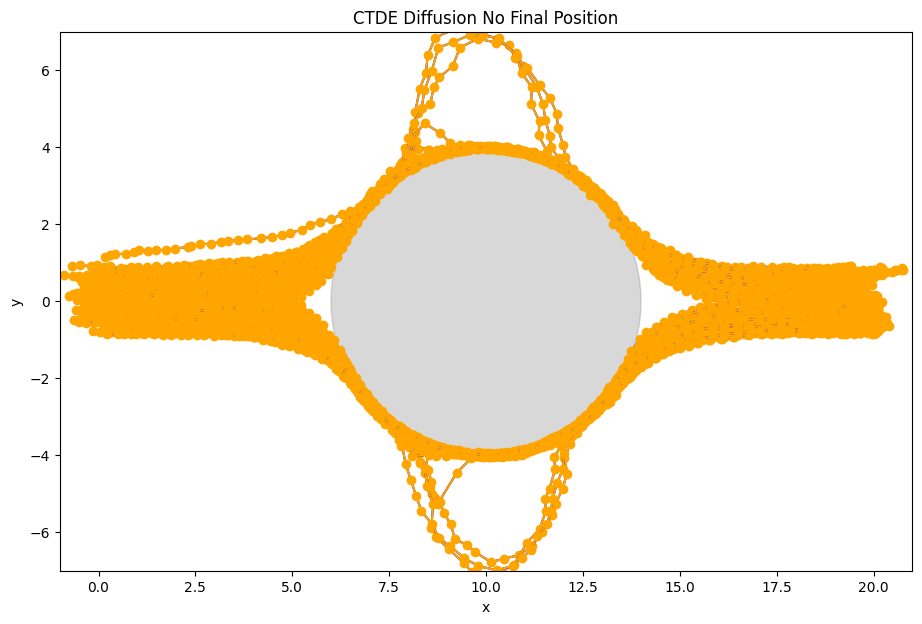

In [261]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion No Final Position")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_nolf_nofinalpos_matchtrain_50k_seed30/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

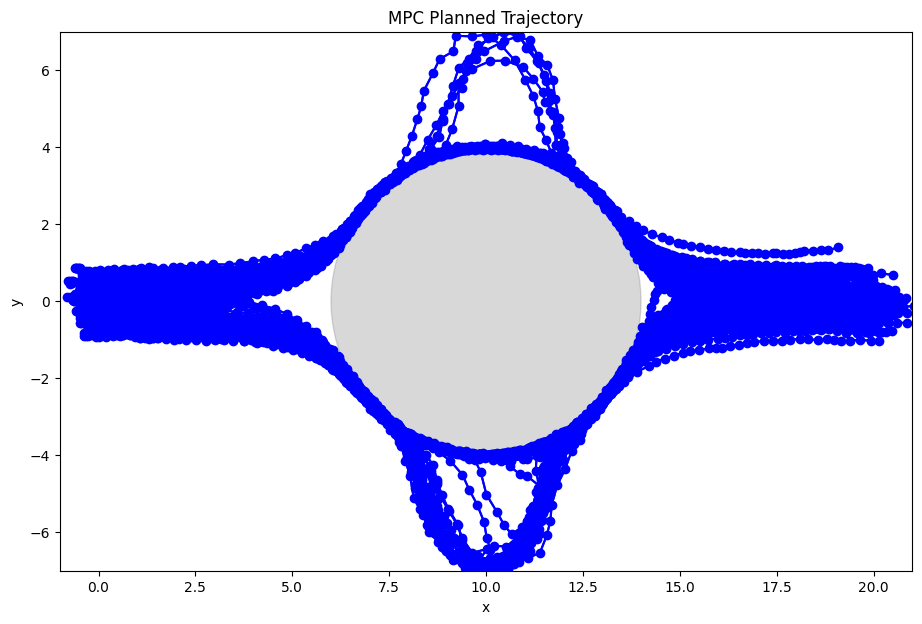

In [262]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_nolf_nofinalpos_matchtrain_50k_seed30/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

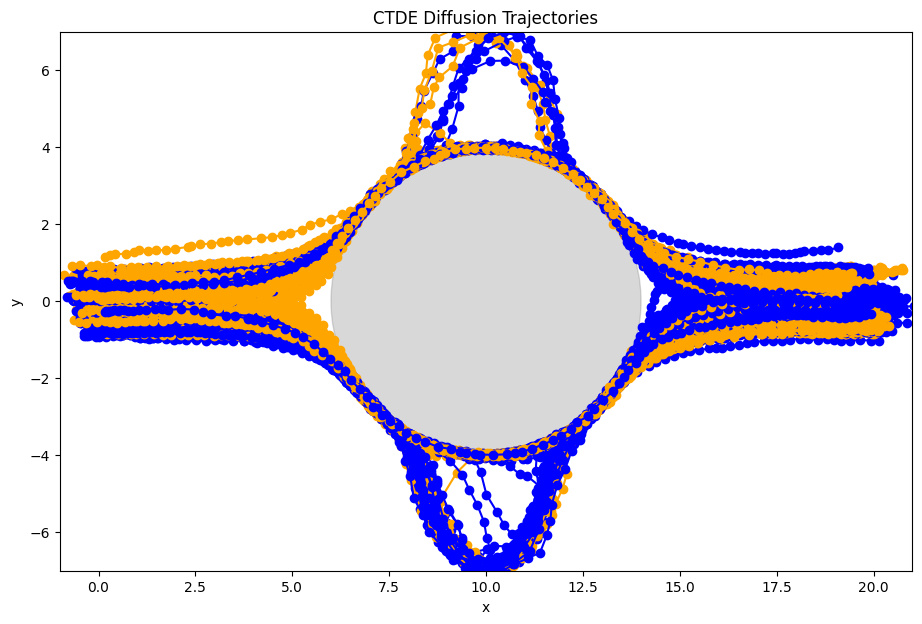

In [263]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [264]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.99)

np.int64(43)

In [265]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [266]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

23

In [13]:
# Vanilla CTDE Diffusion No Final Position

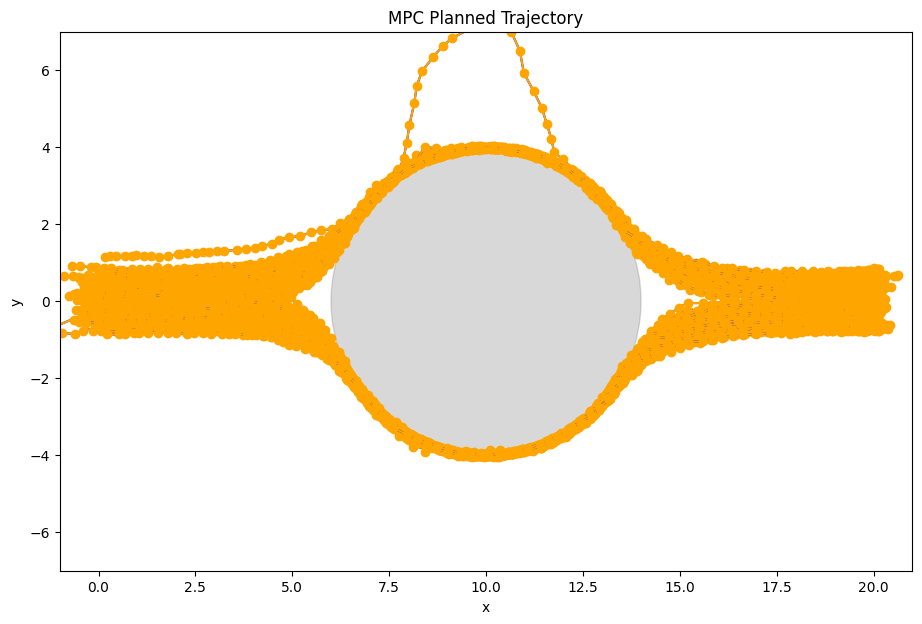

In [267]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_vanillaCTDE_nofinalpos_matchtrain_50k_seed30/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

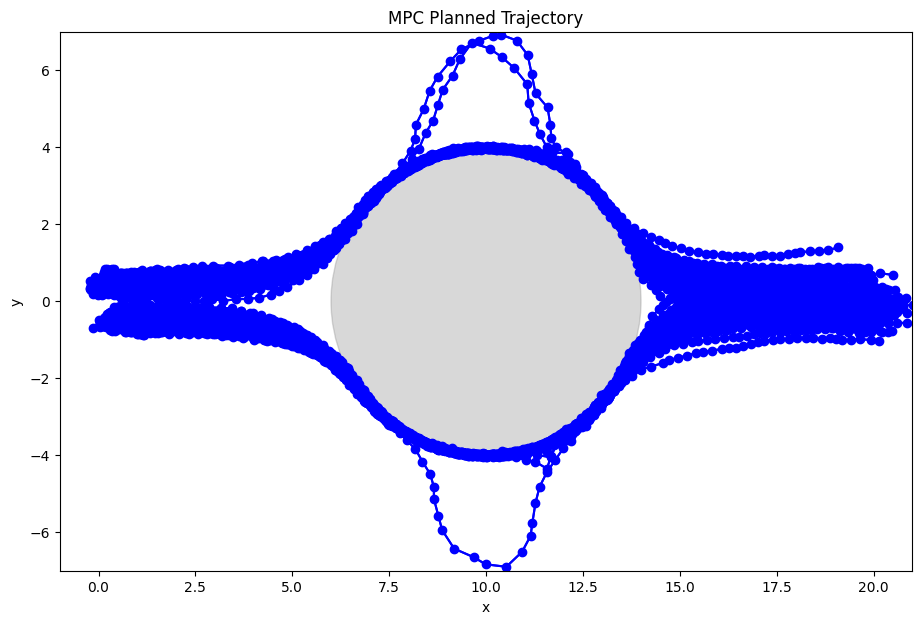

In [268]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_vanillaCTDE_nofinalpos_matchtrain_50k_seed30/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

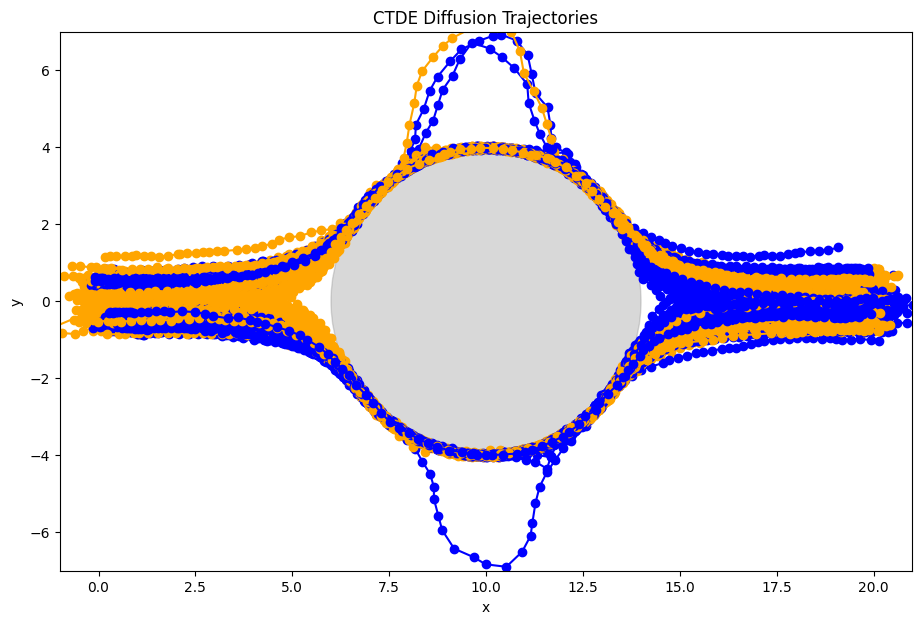

In [269]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [270]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(52)

In [271]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [272]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

52

In [ ]:
# Full Horizon Planning No Final Position

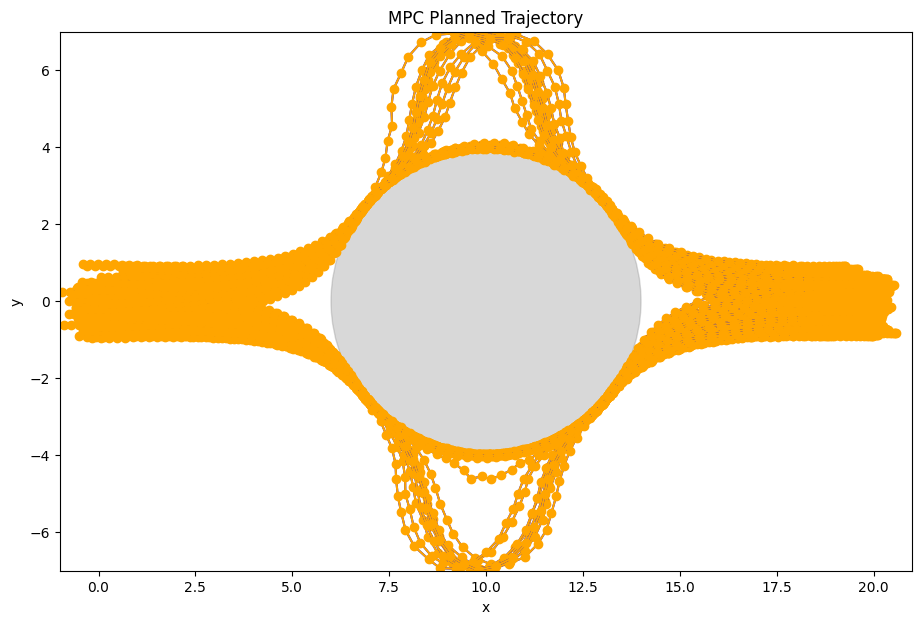

In [182]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/T100_nofinalpos/traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

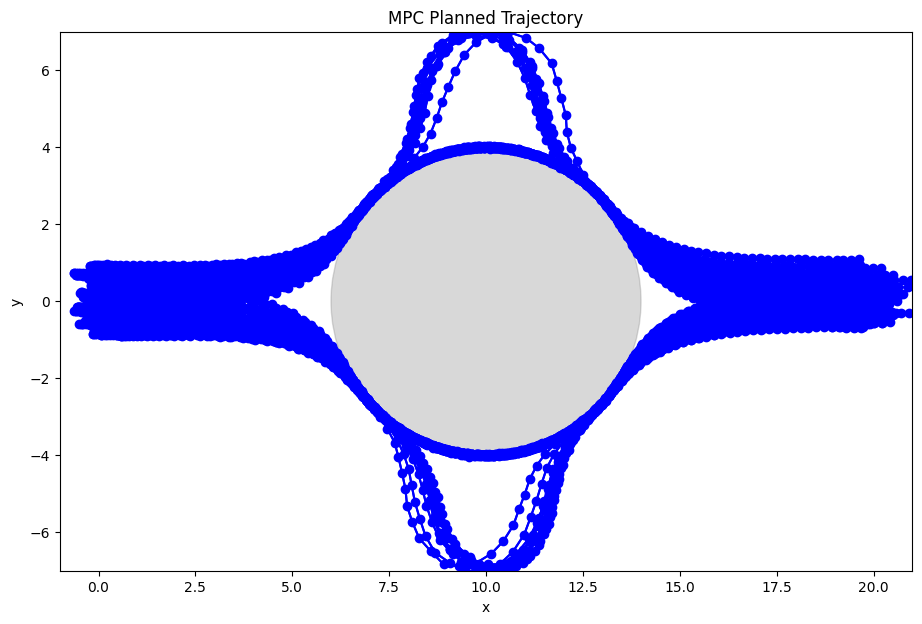

In [183]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/T100_nofinalpos/traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

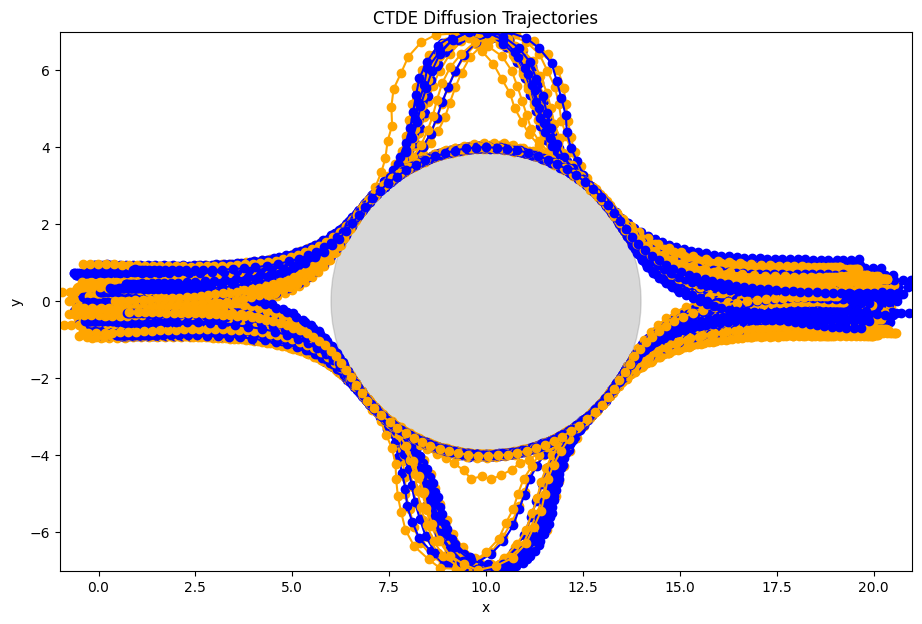

In [184]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [186]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.99)

np.int64(42)

In [187]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [188]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

28

In [20]:
# BC Conditioned on Own Current Position and Own Goal Position

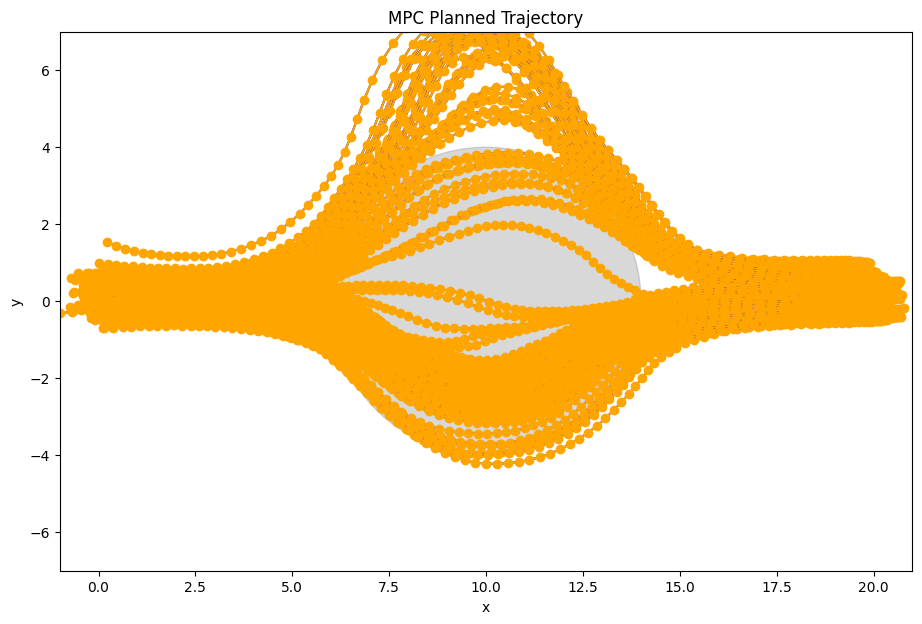

In [121]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_big/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

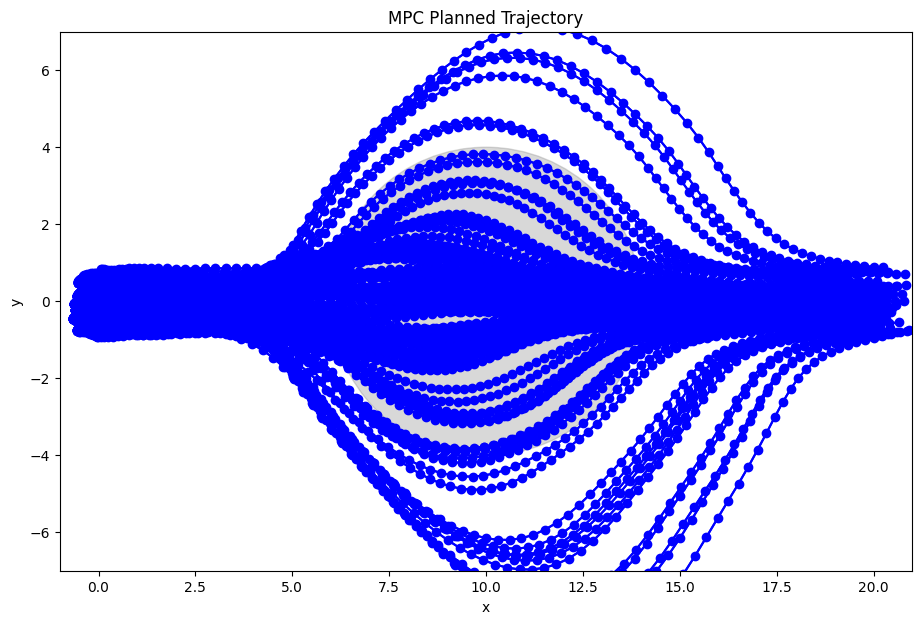

In [122]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_big/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

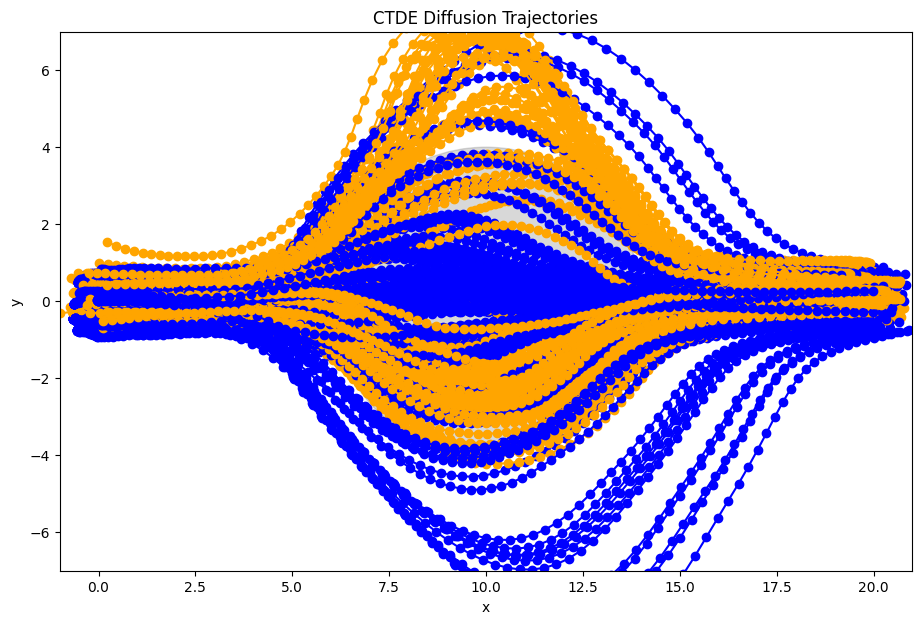

In [123]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [129]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=0.75)

np.int64(6)

In [131]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

92

In [137]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.25, radius=3.6)

94

In [ ]:
# BC Conditioned on Own Current Position and Other's Current Position

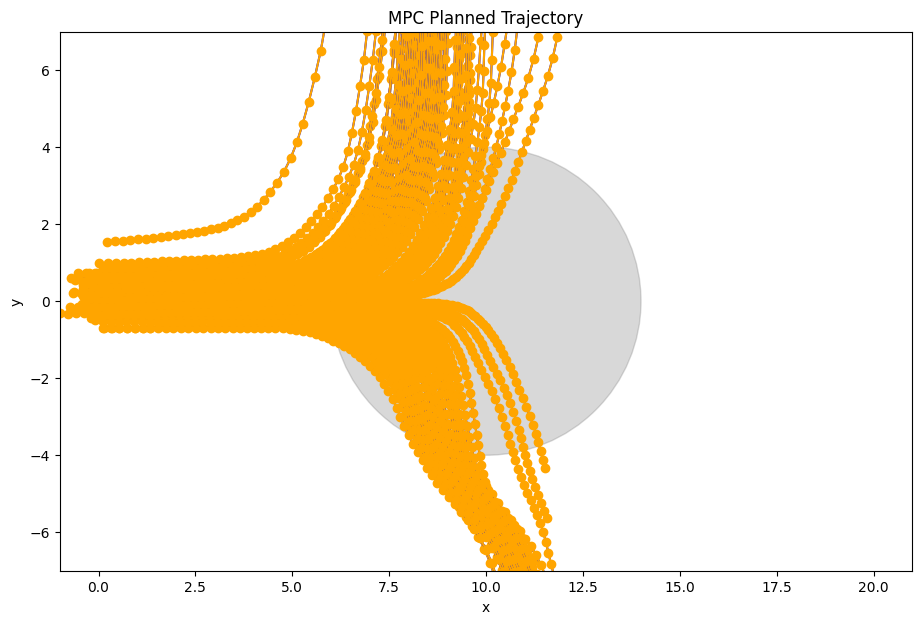

In [210]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_nofinalpos_small/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

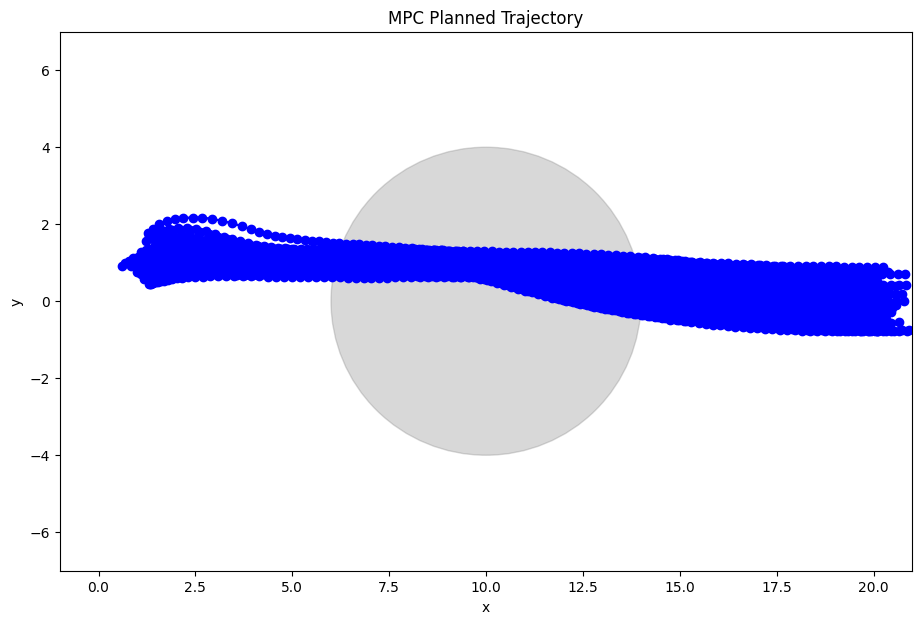

In [211]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_nofinalpos_small/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

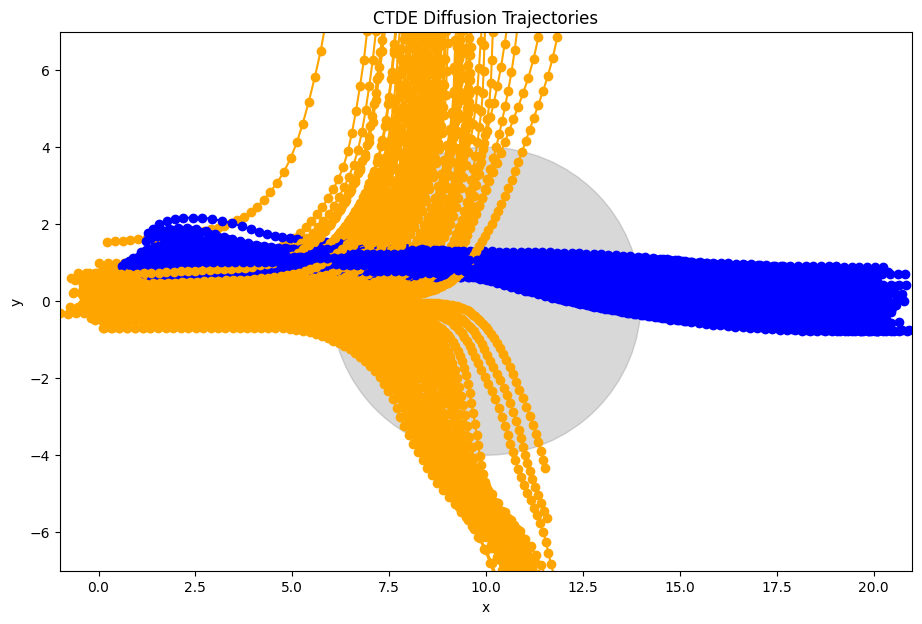

In [212]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [217]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=0.75)

np.int64(9)

In [219]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

100

In [198]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.99, radius=3.6)

100

In [44]:
# MAGAIL Conditioned on Own Current Position and Own Goal Position Vary Initial Position

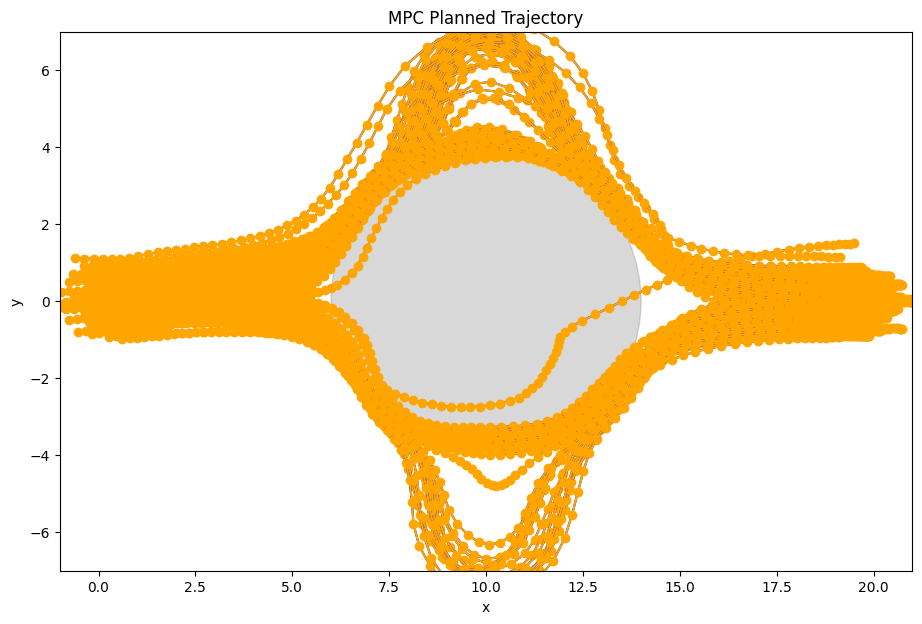

In [146]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_restore_big/vary_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

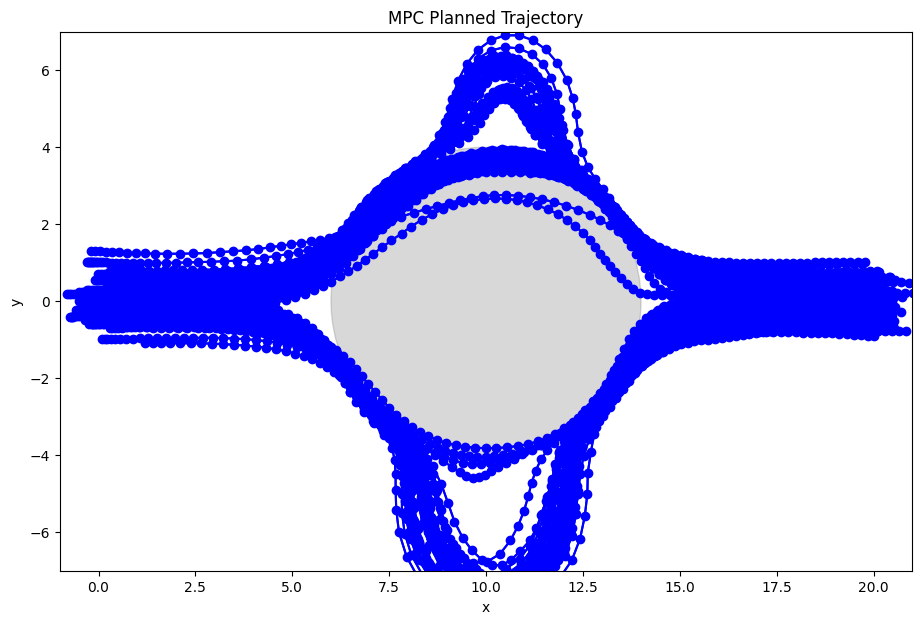

In [147]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_restore_big/vary_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

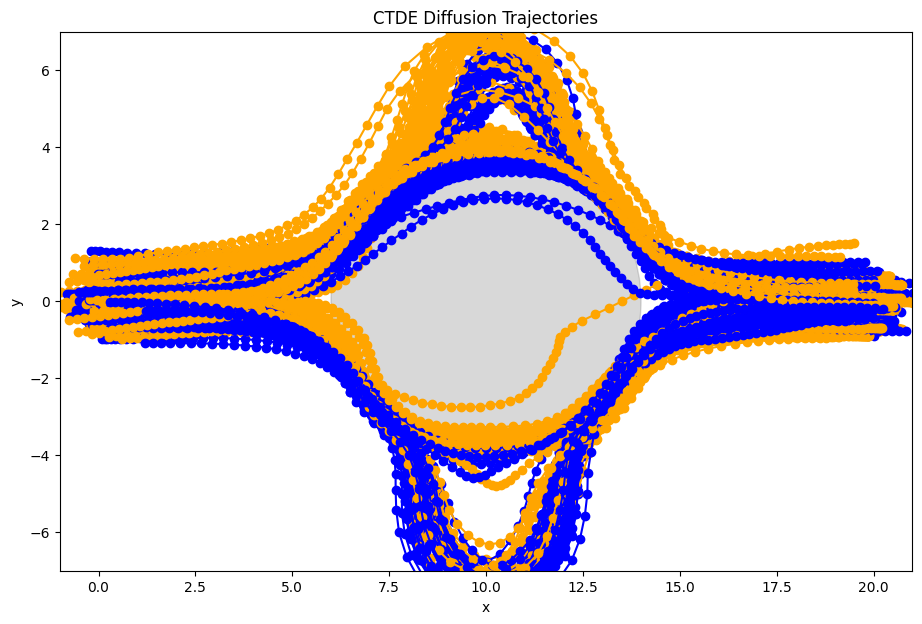

In [148]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [153]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=0.75)

np.int64(27)

In [155]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

35

In [161]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.25, radius=3.6)

60

In [ ]:
# MAGAIL Conditioned on Own Current Position and Own Goal Position Static Initial Position

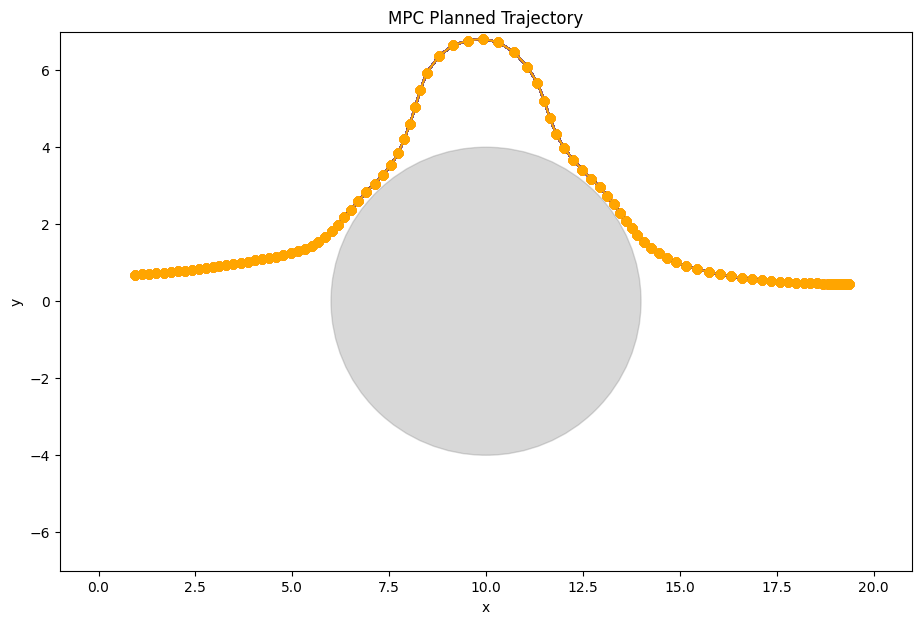

In [162]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_restore_big/static_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

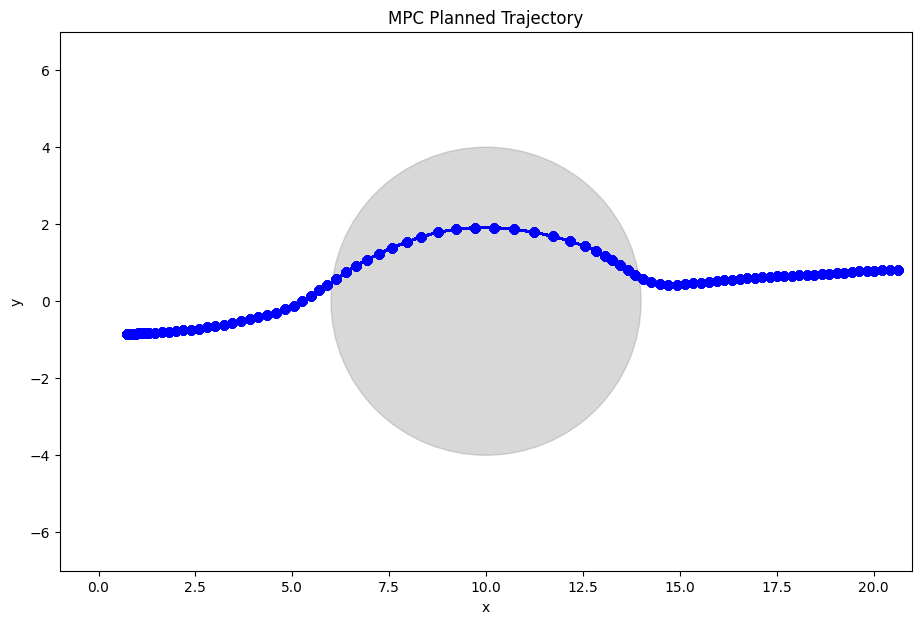

In [163]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_restore_big/static_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

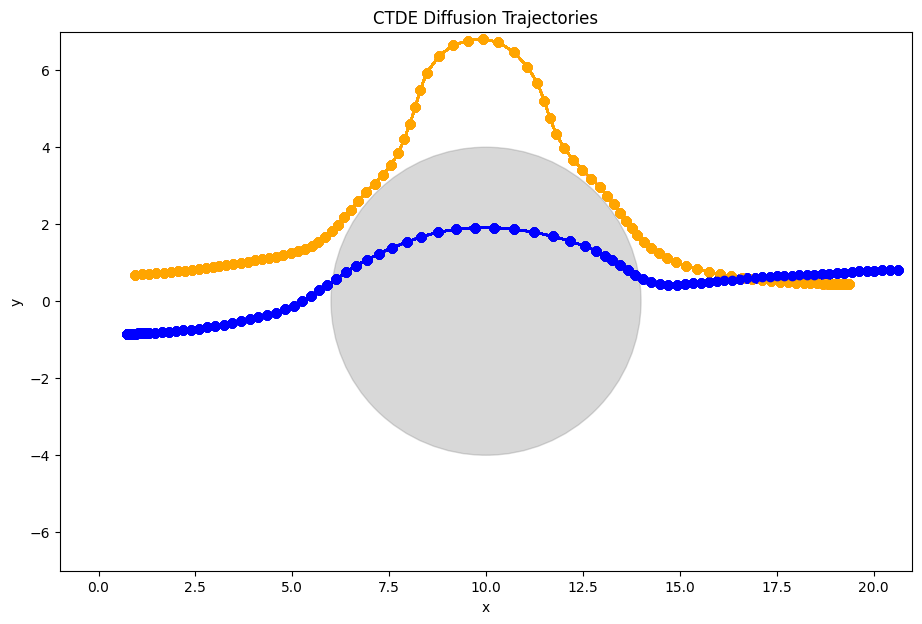

In [164]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [166]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=0.75)

np.int64(0)

In [168]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

100

In [63]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

100

In [ ]:
# MAGAIL Conditioned on Own Current Position and Other's Current Position Vary Initial Position

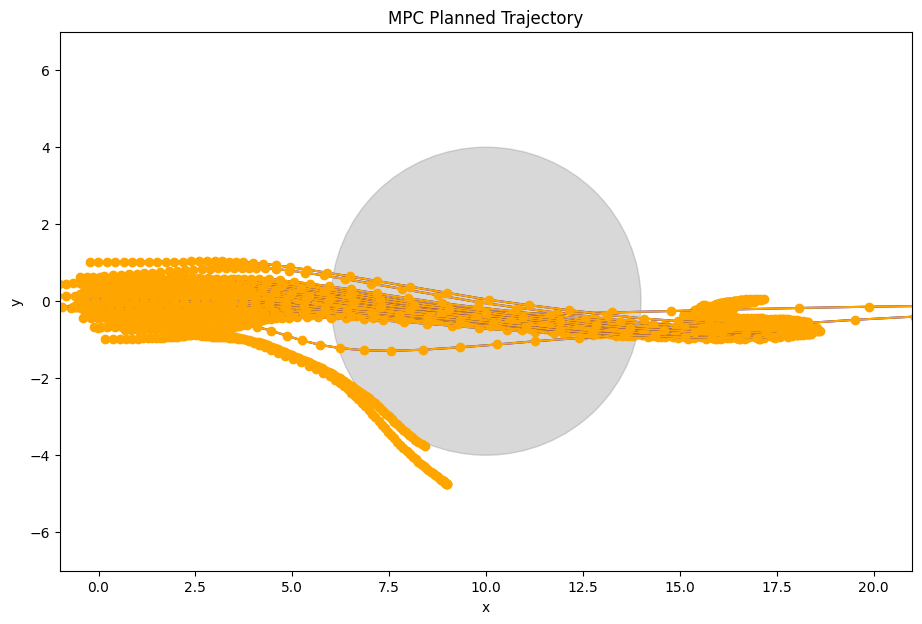

In [220]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_nofinalpos_big2/vary_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

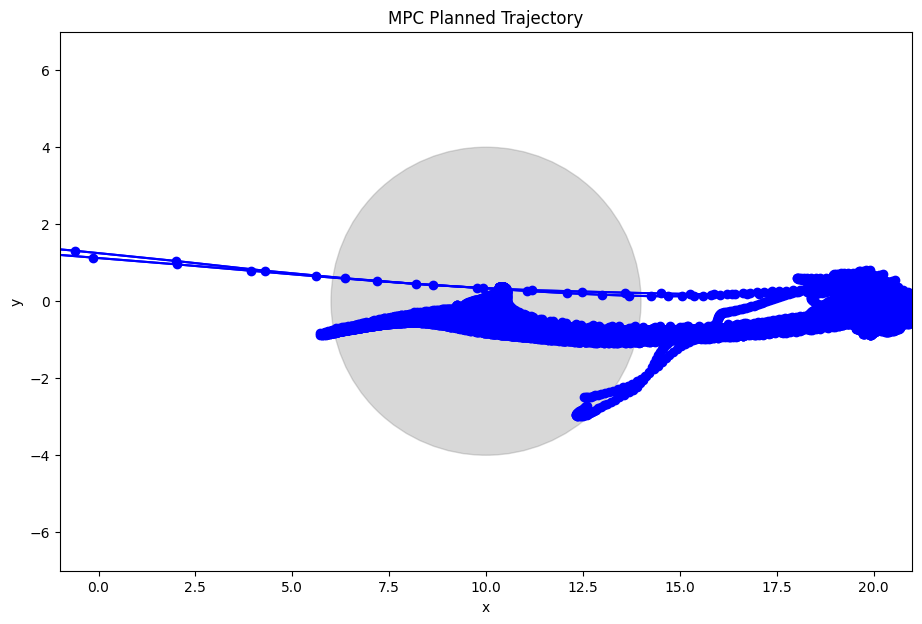

In [221]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_nofinalpos_big2/vary_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

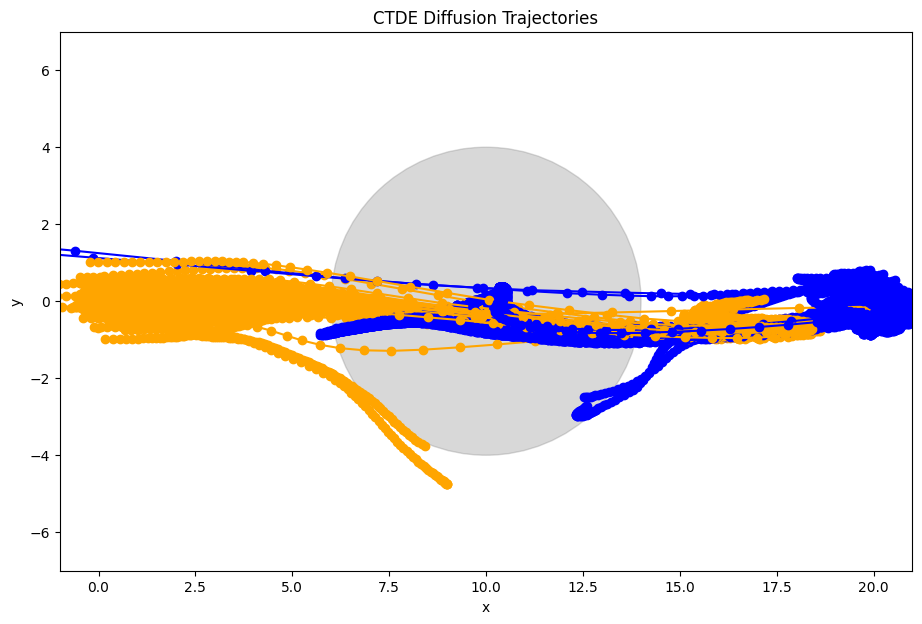

In [222]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [176]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=0.75)

np.int64(96)

In [178]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

99

In [180]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.99, radius=3.6)

99

In [71]:
# MAGAIL Conditioned on Own Current Position and Other's Current Position Static Initial Position

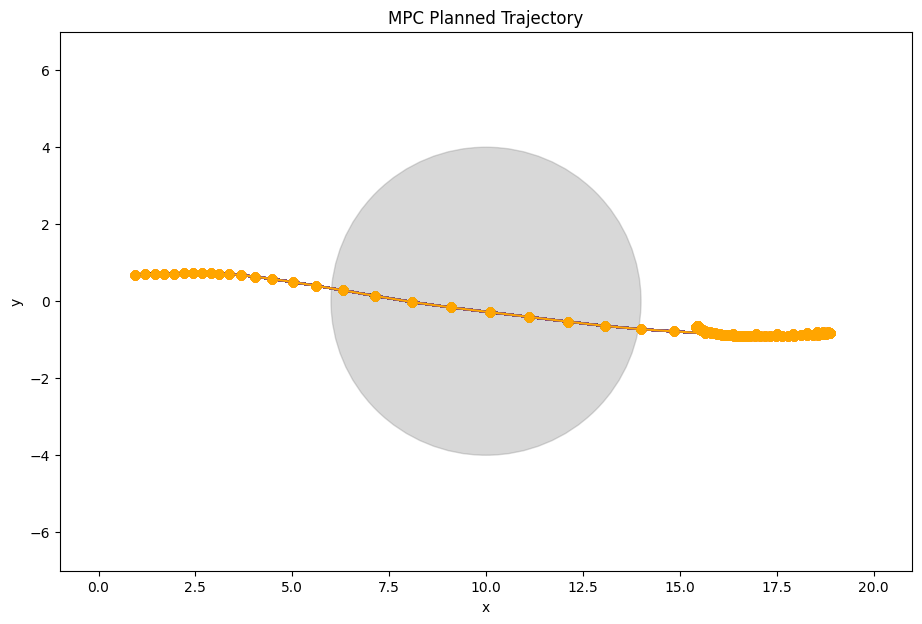

In [85]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_nofinalpos_big2/static_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

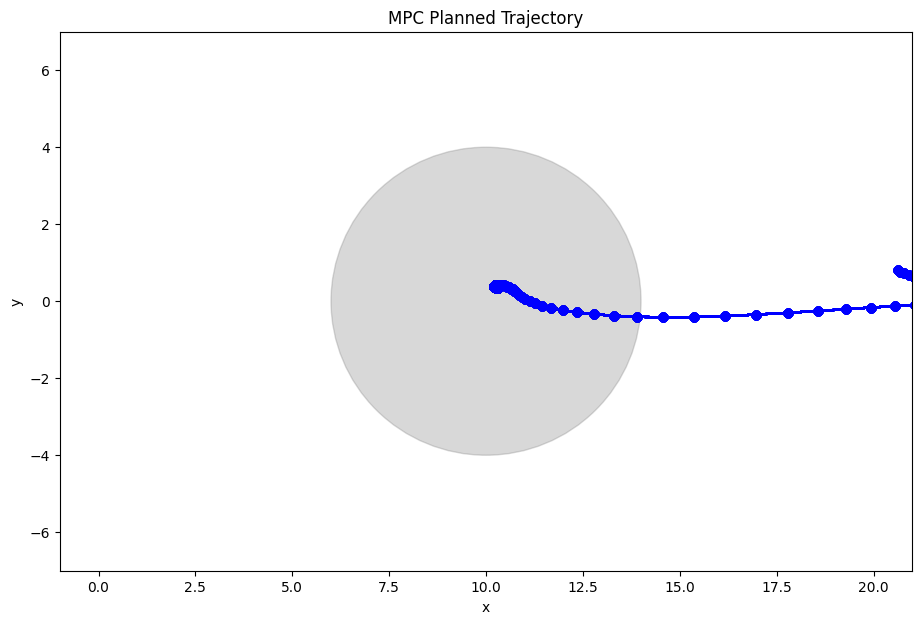

In [86]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_nofinalpos_big2/static_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

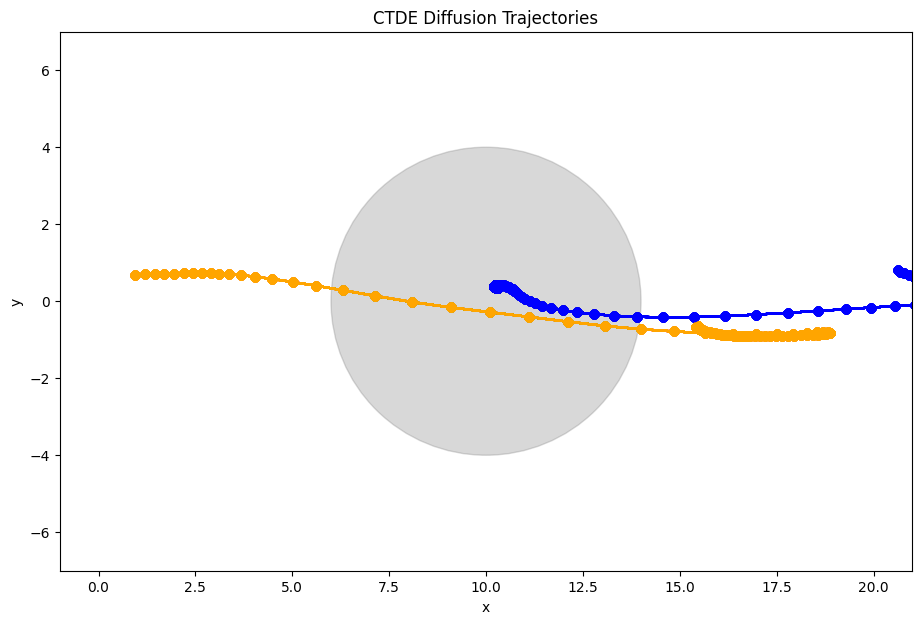

In [87]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [88]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(100)

In [89]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

100

In [90]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

100

In [229]:
# CTDE Diffusion Extra Info

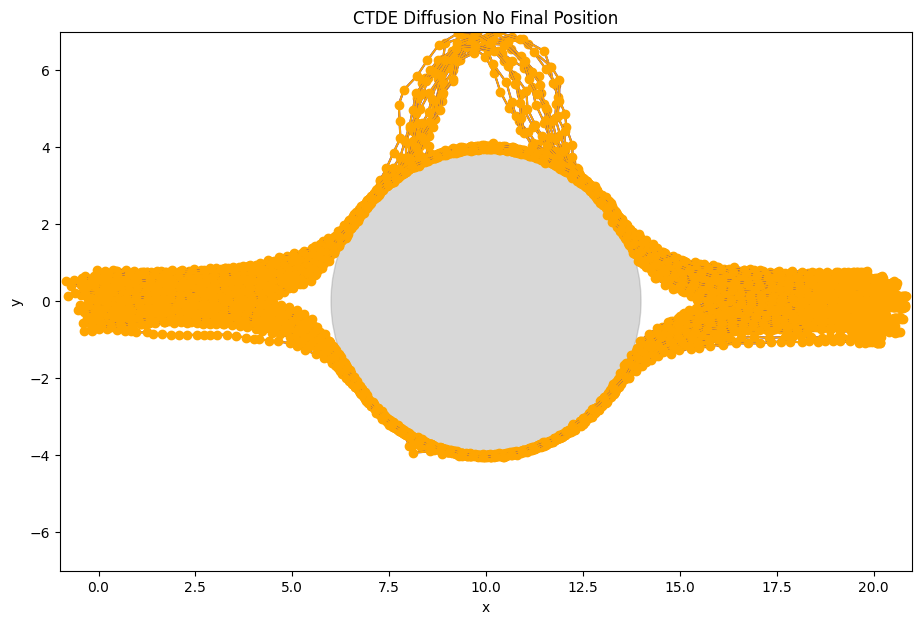

In [273]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion No Final Position")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_ours_extrainfo_seed20/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

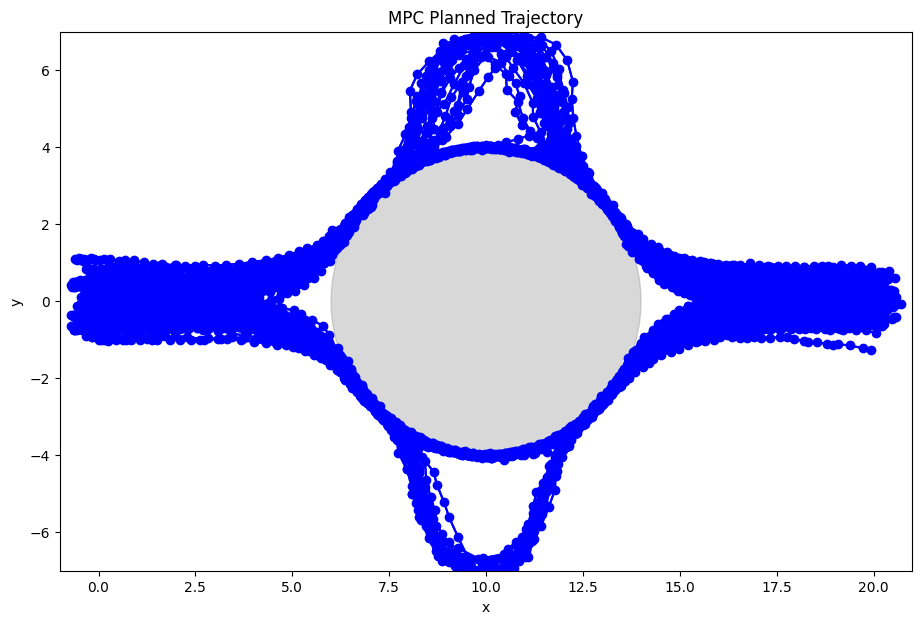

In [275]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_ours_extrainfo_seed20/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

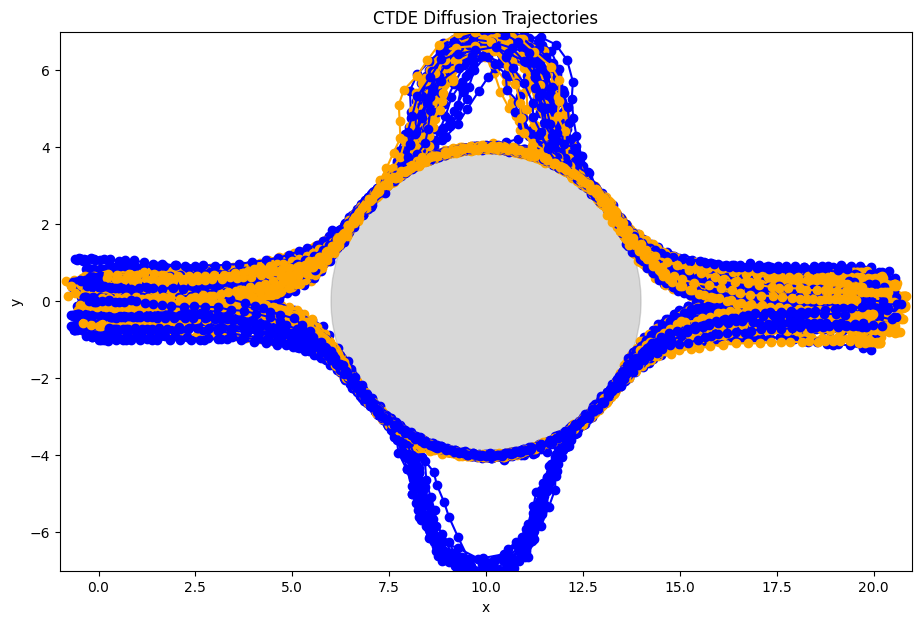

In [276]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [277]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(28)

In [278]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [279]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

28

In [244]:
# Vanilla CTDE Diffusion Extra Info

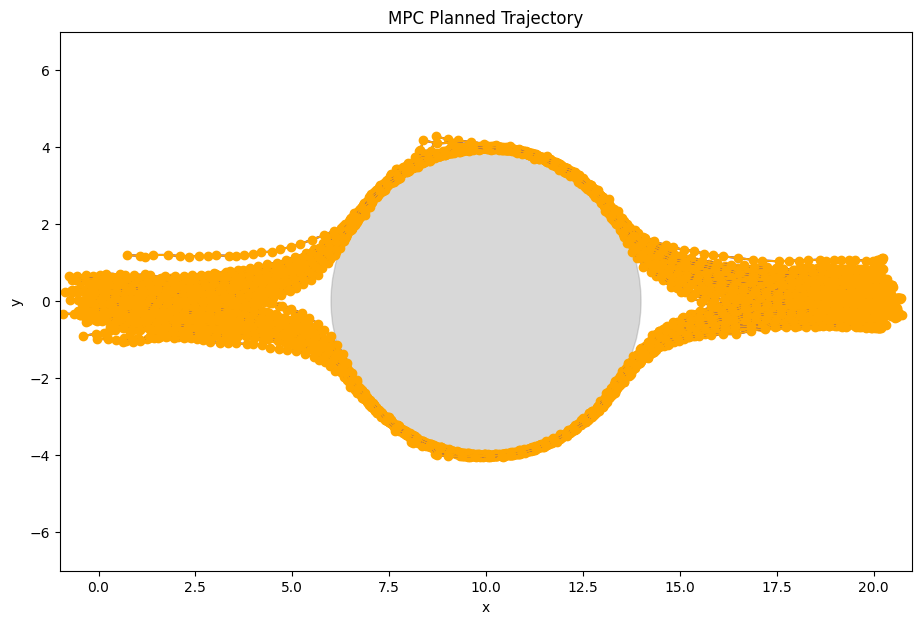

In [282]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_vanillaCTDE_extrainfo_seed20/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

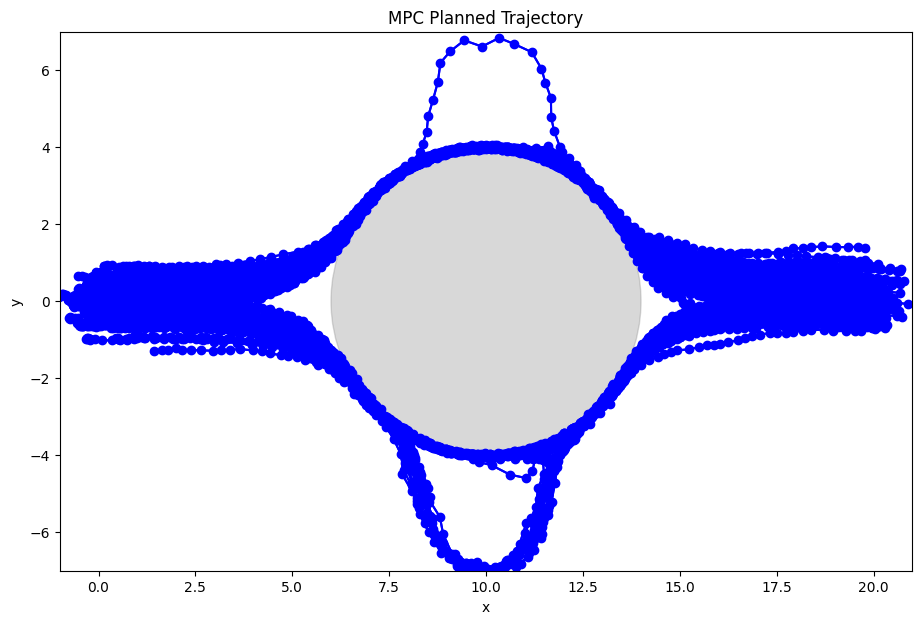

In [283]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_vanillaCTDE_extrainfo_seed20/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

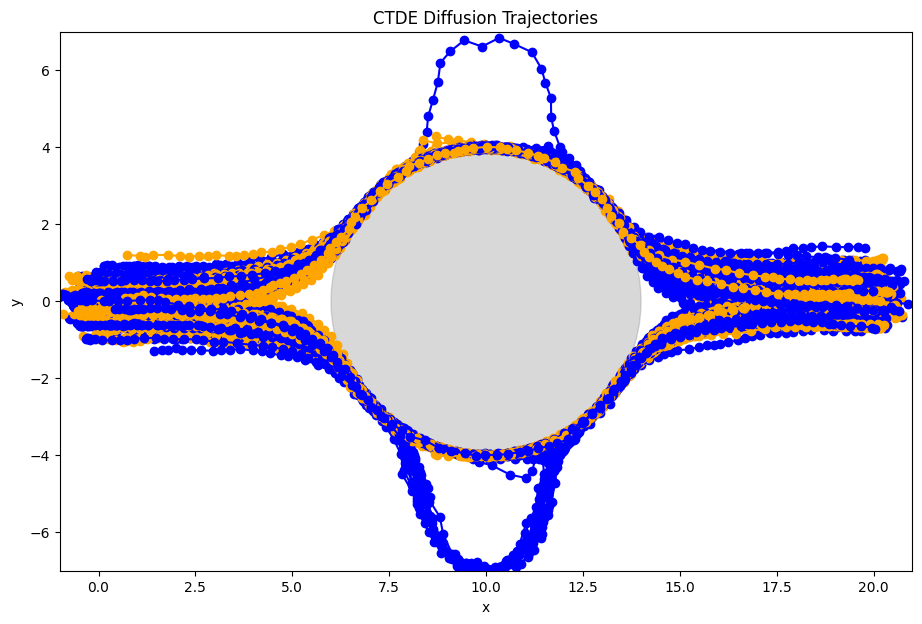

In [284]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [285]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(56)

In [286]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [287]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

56

In [288]:
# BC Extra Info

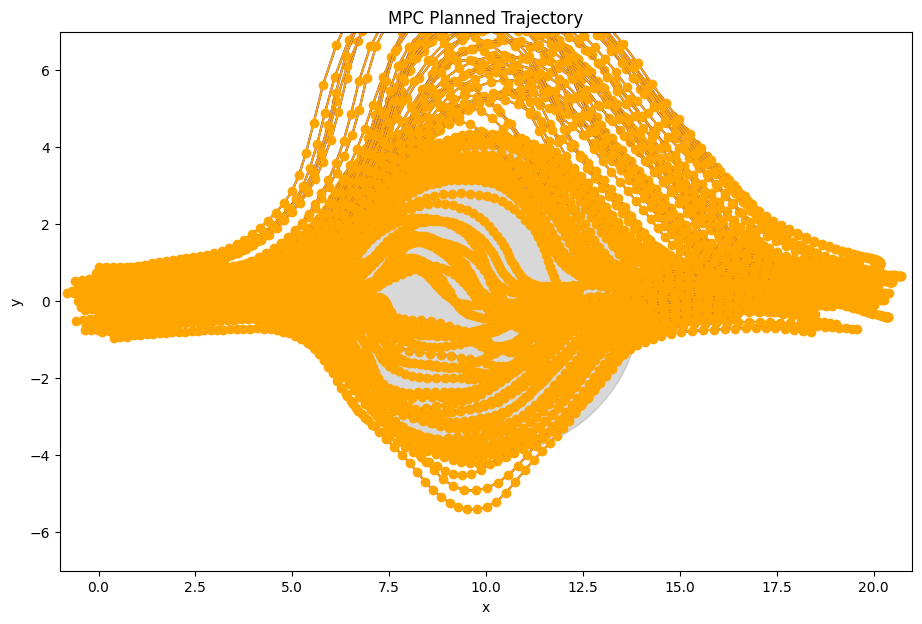

In [289]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_extrainfo_seed10/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

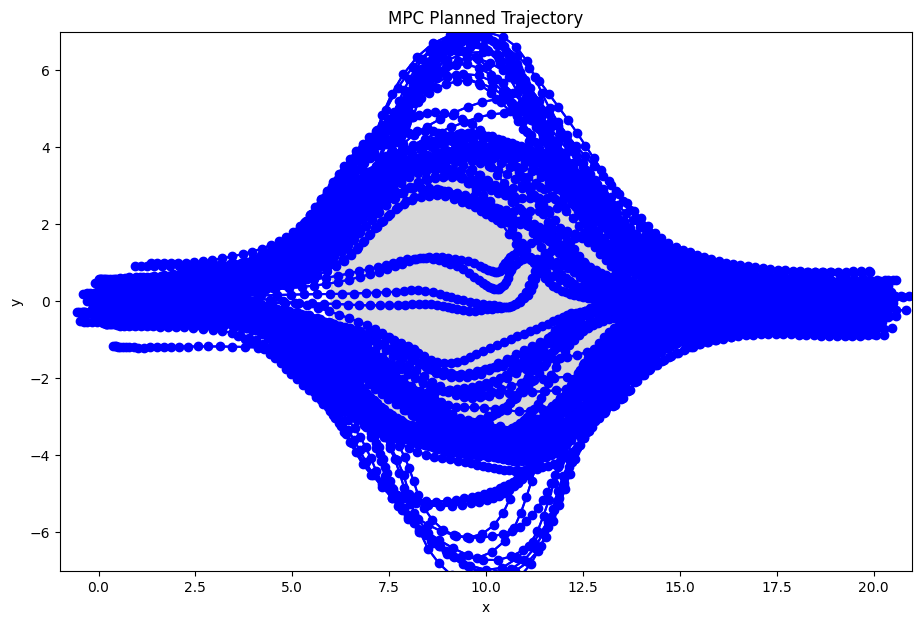

In [290]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_extrainfo_seed10/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

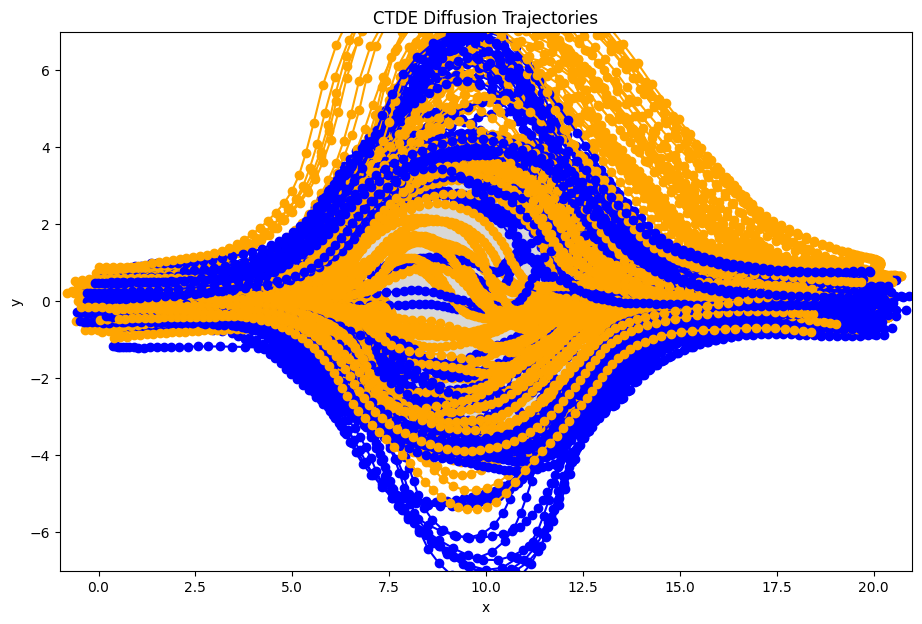

In [291]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [293]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(8)

In [294]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

94

In [295]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

96

In [296]:
# MAGAIL Extra Info Vary Initial Position

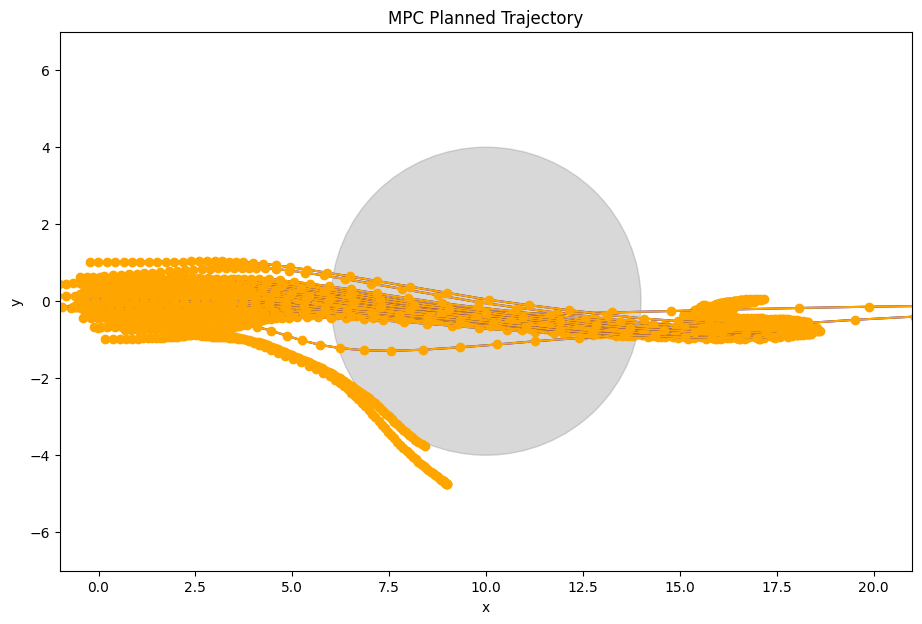

In [297]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_extrainfo_seed10/vary_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

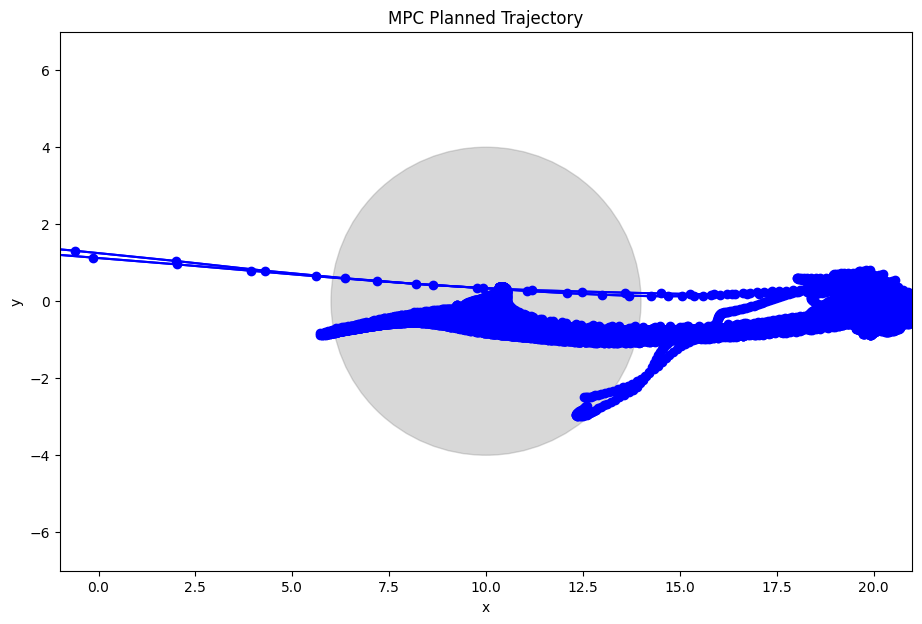

In [298]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_extrainfo_seed10/vary_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

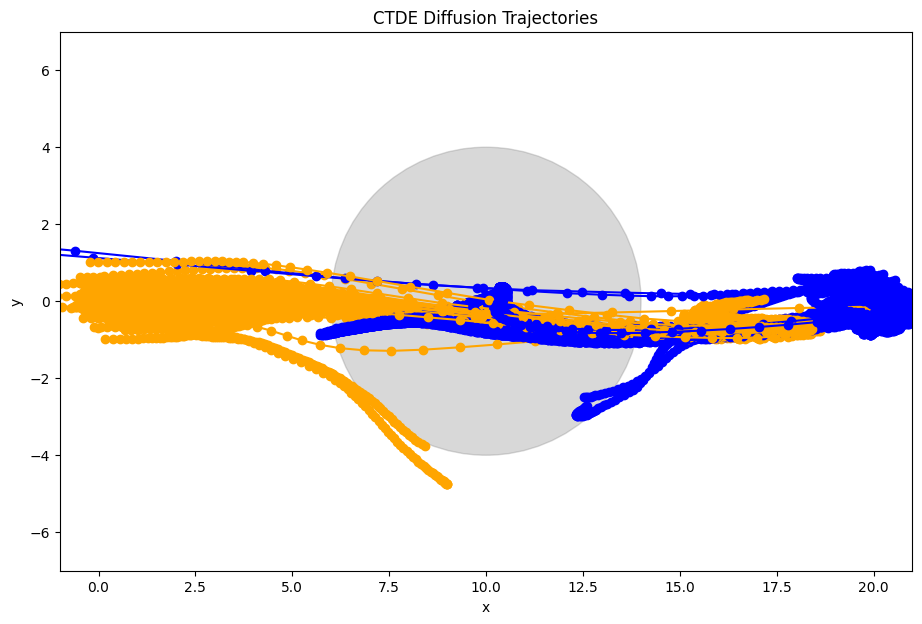

In [299]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [300]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(98)

In [301]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

99

In [302]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

99